Position of node 'Tricalysia': (0, 0.35542)


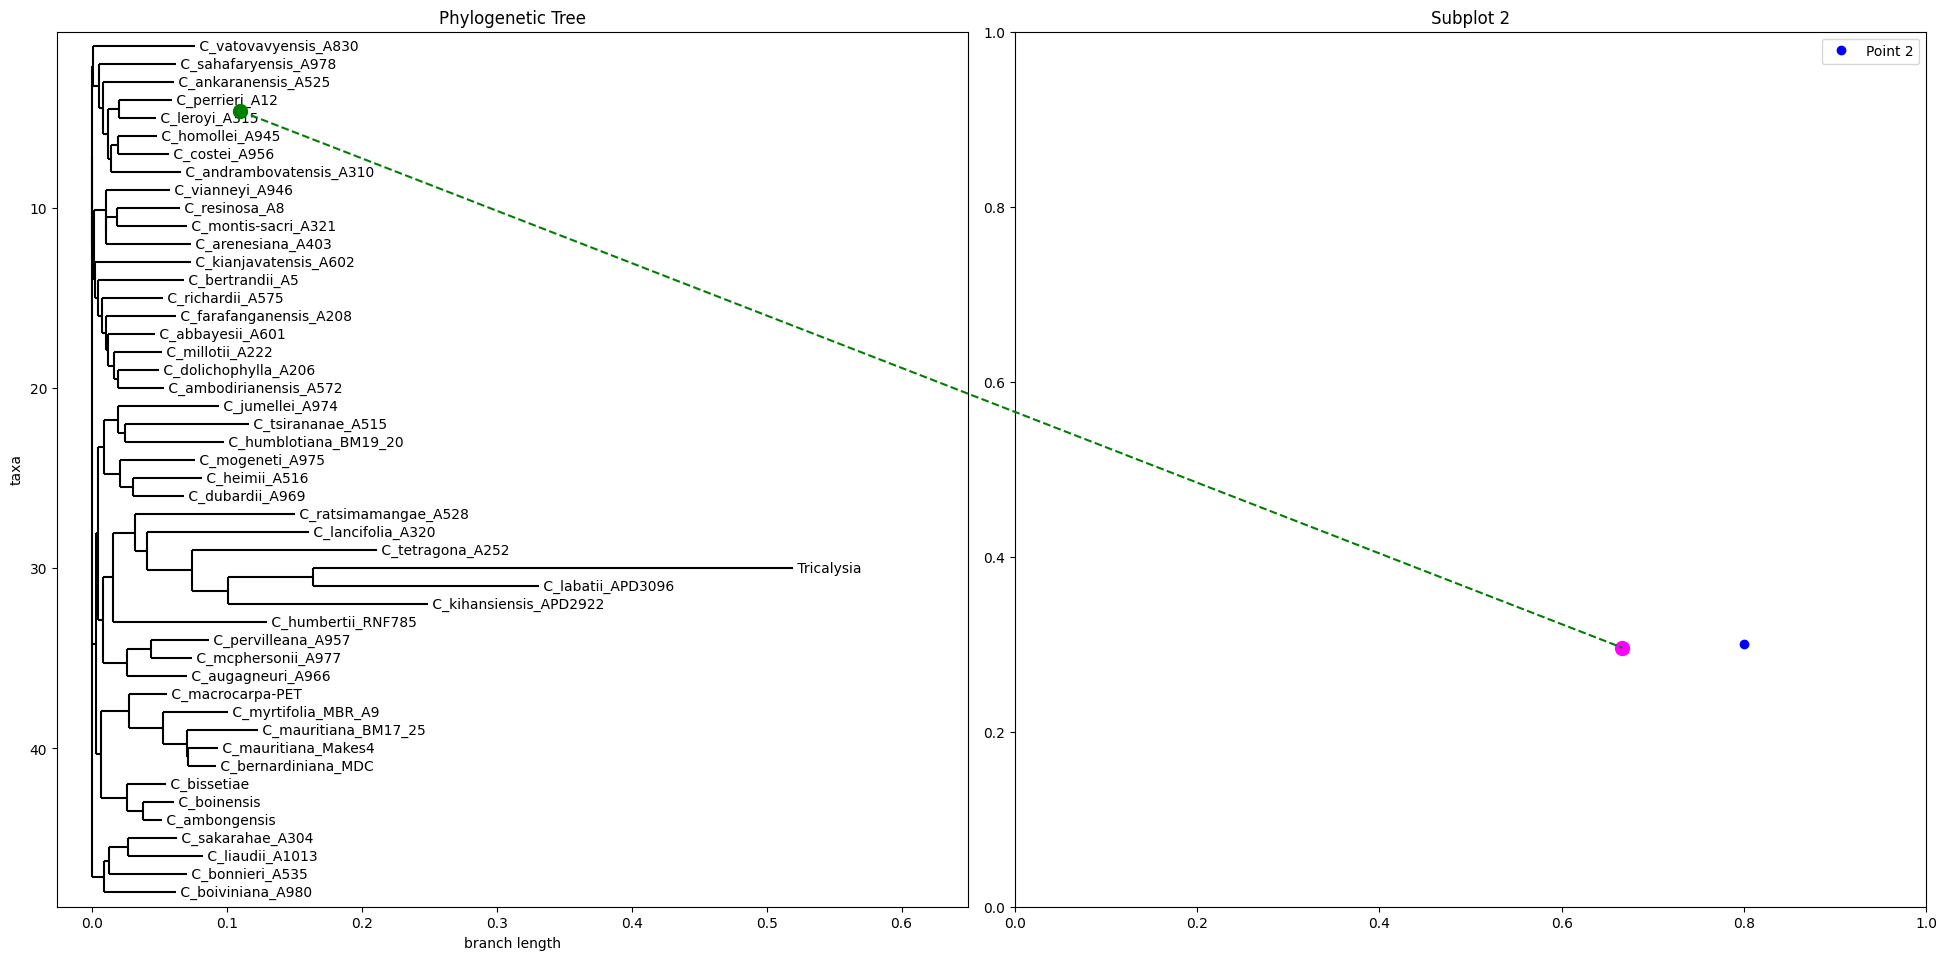

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from Bio import Phylo

# Load your tree
tree = Phylo.read("../tree/phylogenetic_tree.nwk", "newick")

# Read the GPS data
gps = pd.read_csv(r'../data/sample_data_mada.csv', index_col=0)
gps.index.name = "ID"

def custom_label(clade):
    # Check if the node is terminal and its name starts with "C_"
    if clade.is_terminal():
        return clade.name  # Return the original node name for other terminal nodes
    else:
        return None  # Return None for non-terminal nodes

def calc_node_positions(tree, x_start, x_end):
    if tree.is_terminal():
        # If leaf node, place it at the start of the branch
        x_pos = x_start
    else:
        # If internal node, place it in the middle of the branch
        x_pos = (x_start + x_end) / 2
        
        # Recursively calculate positions for child nodes
        for child in tree.clades:
            x_pos = calc_node_positions(child, x_start, x_end)
            x_start = x_pos
    
    # Set the x-position for the node
    tree.position = (x_pos, tree.branch_length)
    return x_pos

# Calculate positions for all nodes
calc_node_positions(tree.root, 0, 1)

# Define the extent of the map (centered around Madagascar)
extent = [43, 51, -27, -11]

# Create a figure for the subplot
fig = plt.figure(figsize=(20, 10))

# Add the tree subplot manually (2/3 width of the figure)
ax_tree = fig.add_subplot(121)
Phylo.draw(tree, do_show=False, axes=ax_tree, label_func=custom_label)
ax_tree.set_title("Phylogenetic Tree")
ax_tree.plot()
node_positions = {clade.name: clade.position for clade in tree.find_clades()}

# Now you can access the positions of tree nodes using their names
print("Position of node 'Tricalysia':", node_positions.get('Tricalysia') )

# Graph 2
ax2 = fig.add_subplot(122)

# Example data points
#x1, y1 = node_positions.get('Tricalysia')
x1, y1 = 0, 0.35542  # Point in the first subplot
x2, y2 = 0.8, 0.3  # Point in the second subplot

# Plot points in each subplot
#ax1.plot(x1, y1, 'ro', label='Point 1')
ax2.plot(x2, y2, 'bo', label='Point 2')

# Attempt to draw a line connecting the two points across subplots
# Add an invisible subplot for the purpose of plotting the line
ax_invisible = fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", top=False, bottom=False, left=False, right=False)
plt.grid(False)

# Convert the points' coordinates from their respective ax to figure coordinates
xy1 = ax_tree.transData.transform([x1, y1])
xy2 = ax2.transData.transform([x2, y2])
fig_xy1 = fig.transFigure.inverted().transform(xy1)
fig_xy2 = fig.transFigure.inverted().transform(xy2)

# Validate by plotting points in figure coordinates using plt.Line2D
point1 = plt.Line2D([fig_xy1[0]], [fig_xy1[1]], color='green', marker='o', linestyle='None', markersize=10)
point2 = plt.Line2D([fig_xy2[0]], [fig_xy2[1]], color='magenta', marker='o', linestyle='None', markersize=10)
fig.add_artist(point1)
fig.add_artist(point2)

# Draw the line in figure coordinates
line = plt.Line2D([fig_xy1[0], fig_xy2[0]], [fig_xy1[1], fig_xy2[1]], 
                  transform=fig.transFigure, color="green", linestyle="--")
fig.lines.append(line)

# Draw the line in figure coordinates
#line = plt.Line2D([fig_xy1[0],fig_xy2[0]], [fig_xy1[1],fig_xy2[1]], transform=fig.transFigure, color="green", linestyle="--")
#fig.lines.extend([line])
#fig.lines.append(line)
# Customize subplots
#ax1.set_title('Subplot 1')
ax2.set_title('Subplot 2')
#ax1.set_xlim(0, 1)
#ax1.set_ylim(0, 1)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)

# Show legend for points
#ax1.legend()
ax2.legend()
'''
# Add the map subplot manually (1/3 width of the figure) with the projection
ax_map = fig.add_subplot(122, projection=ccrs.PlateCarree())
ax_map.set_extent(extent)

for index, row in gps.iterrows():
    ax_map.plot(row["longitude"], row["latitude"], 'bo', markersize=3)

ax_map.coastlines(resolution='10m')
ax_map.add_feature(cfeature.BORDERS)
ax_map.set_title("Species Coordinates")

last_node_position_fig = ax_tree.transData.transform(node_positions.get('Tricalysia')) 
#last_node_position_fig = ax_tree.transData.transform((0.35,42.0)) 
last_node_position_fig = fig.transFigure.inverted().transform(last_node_position_fig)

geo_point_fig = ax_map.projection.transform_point(48.38, -19.19, src_crs=ccrs.Geodetic())
geo_point_fig = ax_map.transData.transform(geo_point_fig)  # First, to ax_map's pixel coordinates
geo_point_fig = fig.transFigure.inverted().transform(geo_point_fig)  # Then to figure's coordinate system

print(geo_point_fig)
print(gps.iloc[0,1])
print(gps.iloc[0,0])
print(gps)
# Draw the line in figure coordinates
line = plt.Line2D([last_node_position_fig[0], geo_point_fig[0]], [last_node_position_fig[1], geo_point_fig[1]], transform=fig.transFigure, color="green", linestyle="--")
fig.lines.append(line)
'''
plt.tight_layout()
plt.show()

Position of node 'Tricalysia': (0, 0.35542)


c:\Users\forc2101\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\forc2101\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


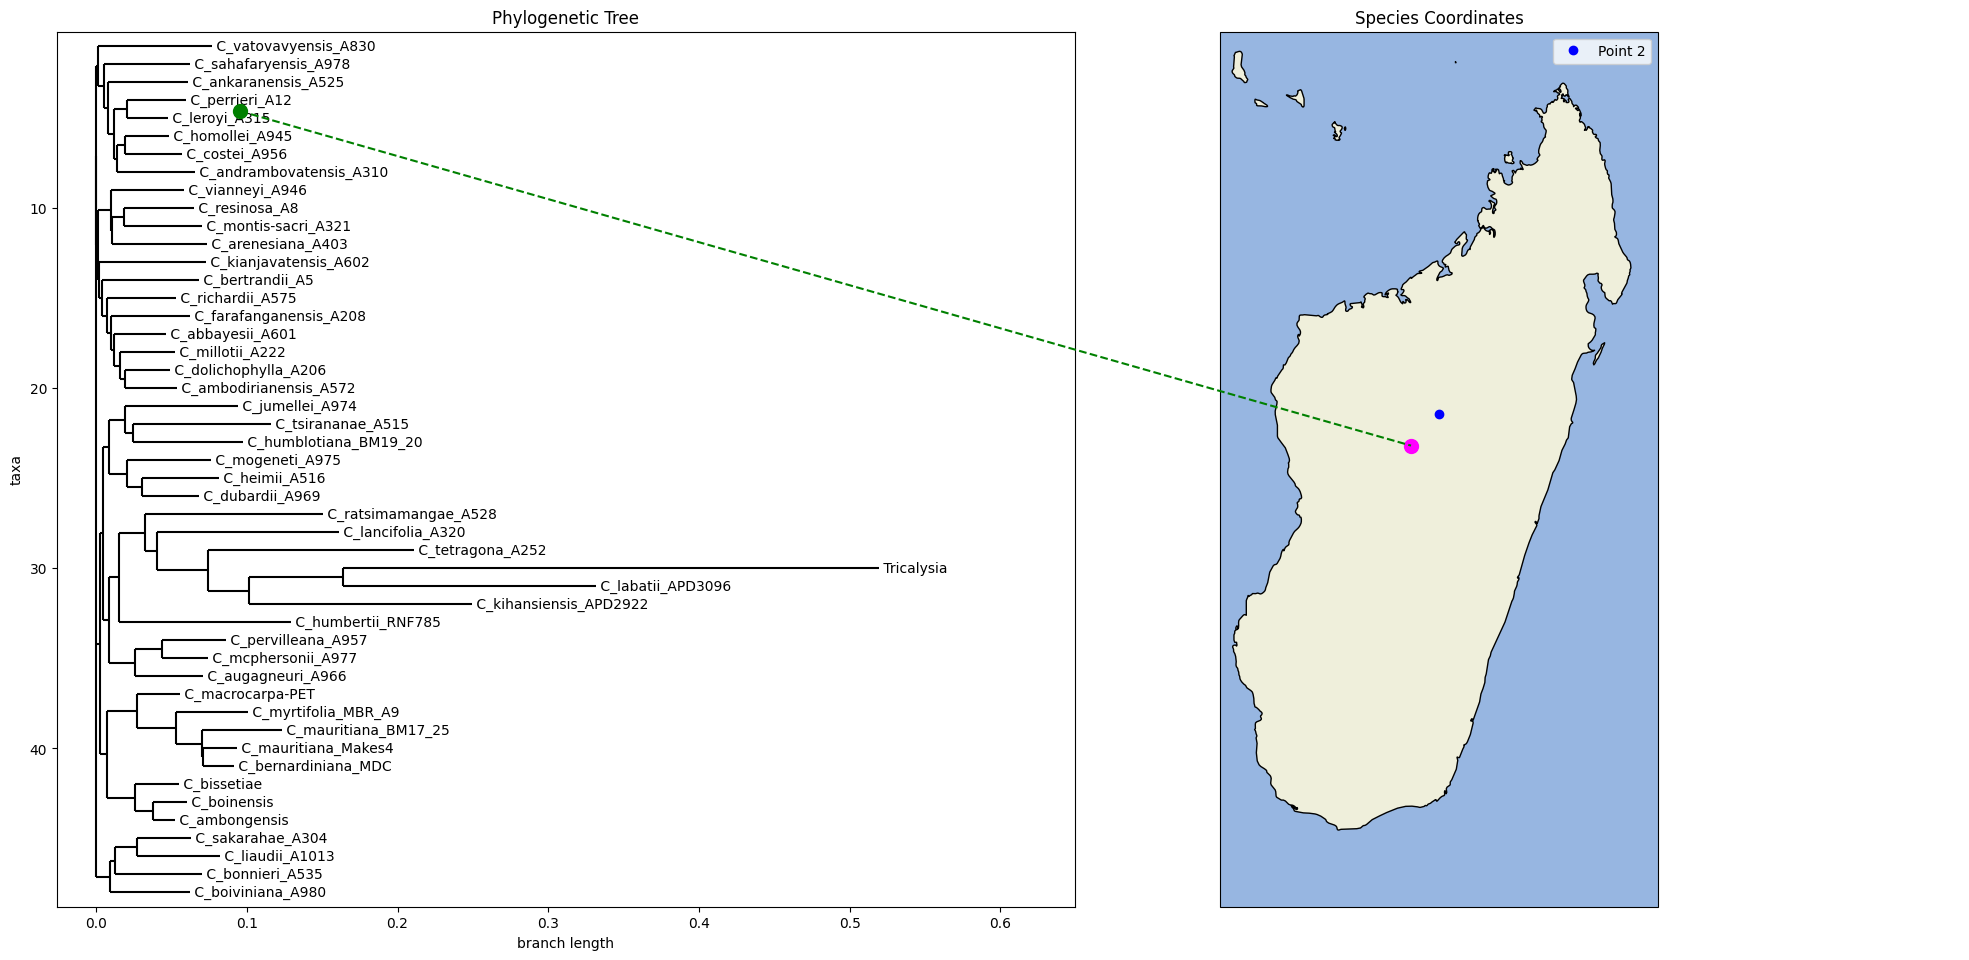

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from Bio import Phylo

# Load your tree
tree = Phylo.read("../tree/phylogenetic_tree.nwk", "newick")

# Read the GPS data
gps = pd.read_csv(r'../data/sample_data_mada.csv', index_col=0)
gps.index.name = "ID"

def custom_label(clade):
    if clade.is_terminal():
        return clade.name
    else:
        return None

def calc_node_positions(tree, x_start, x_end):
    if tree.is_terminal():
        x_pos = x_start
    else:
        x_pos = (x_start + x_end) / 2
        for child in tree.clades:
            x_pos = calc_node_positions(child, x_start, x_end)
            x_start = x_pos
    tree.position = (x_pos, tree.branch_length)
    return x_pos

calc_node_positions(tree.root, 0, 1)

extent = [43, 51, -27, -11]

fig = plt.figure(figsize=(20, 10))

ax_tree = fig.add_subplot(121)
Phylo.draw(tree, do_show=False, axes=ax_tree, label_func=custom_label)
ax_tree.set_title("Phylogenetic Tree")
node_positions = {clade.name: clade.position for clade in tree.find_clades()}

print("Position of node 'Tricalysia':", node_positions.get('Tricalysia'))

ax2 = fig.add_subplot(122, projection=ccrs.PlateCarree())
ax2.set_extent(extent)
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')

x1, y1 = node_positions.get('Tricalysia')
x2, y2 = 47, -18

ax2.plot(x2, y2, 'bo', label='Point 2')

ax_invisible = fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", top=False, bottom=False, left=False, right=False)
plt.grid(False)

xy1 = ax_tree.transData.transform([x1, y1])
xy2 = ax2.transData.transform([x2, y2])
fig_xy1 = fig.transFigure.inverted().transform(xy1)
fig_xy2 = fig.transFigure.inverted().transform(xy2)

point1 = plt.Line2D([fig_xy1[0]], [fig_xy1[1]], color='green', marker='o', linestyle='None', markersize=10)
point2 = plt.Line2D([fig_xy2[0]], [fig_xy2[1]], color='magenta', marker='o', linestyle='None', markersize=10)
fig.add_artist(point1)
fig.add_artist(point2)

line = plt.Line2D([fig_xy1[0], fig_xy2[0]], [fig_xy1[1], fig_xy2[1]], 
                  transform=fig.transFigure, color="green", linestyle="--")
fig.lines.append(line)

ax2.set_title('Species Coordinates')
ax2.legend()
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.tight_layout()
plt.show()


Position of node 'Tricalysia': (0, 0.35542)
Data coordinates in ax_tree (x1, y1): [0, 0.35542]
Display coordinates in ax_tree (xy1_display): [277.0979021  877.53758436]
Figure coordinates in ax_tree (fig_xy1): [0.13854895 0.87753758]
Data coordinates in ax_map (x2, y2): [47, -18]
Display coordinates in ax_map (xy2_display): [1447.72727273  543.125     ]
Figure coordinates in ax_map (fig_xy2): [0.72386364 0.543125  ]


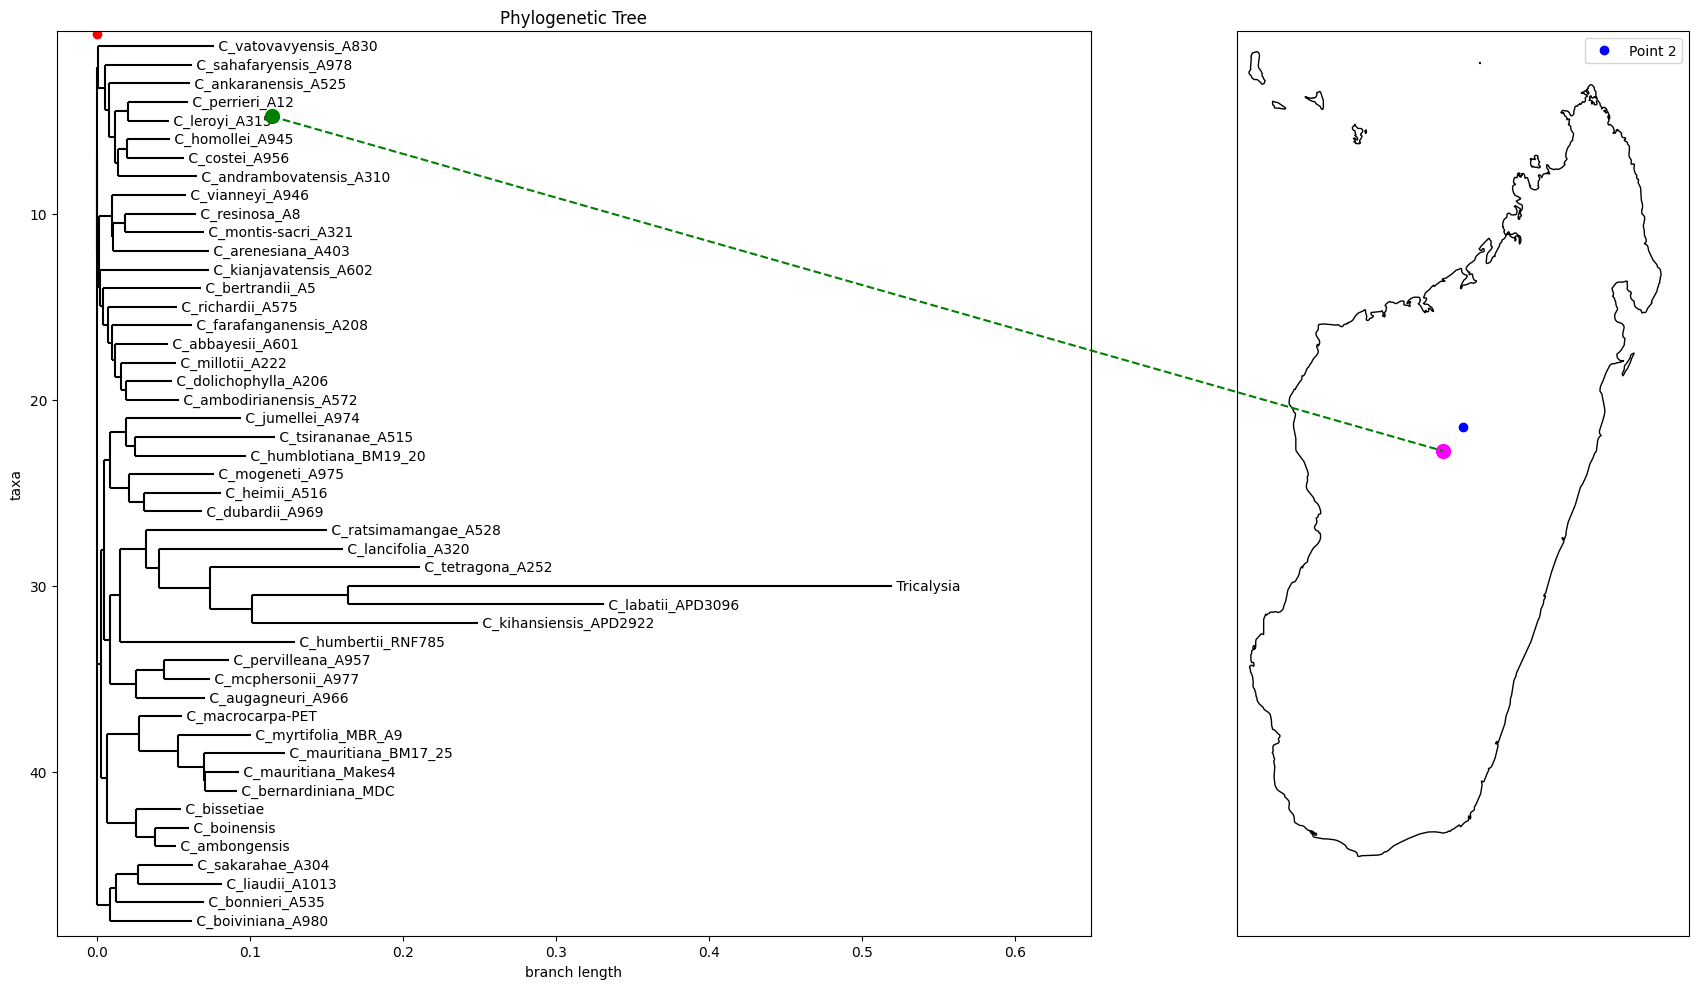

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from Bio import Phylo

# Load your tree
tree = Phylo.read("../tree/phylogenetic_tree.nwk", "newick")

# Read the GPS data
gps = pd.read_csv(r'../data/sample_data_mada.csv', index_col=0)
gps.index.name = "ID"

def custom_label(clade):
    if clade.is_terminal():
        return clade.name
    else:
        return None

def calc_node_positions(tree, x_start, x_end):
    if tree.is_terminal():
        x_pos = x_start
    else:
        x_pos = (x_start + x_end) / 2
        for child in tree.clades:
            x_pos = calc_node_positions(child, x_start, x_end)
            x_start = x_pos
    tree.position = (x_pos, tree.branch_length)
    return x_pos

calc_node_positions(tree.root, 0, 1)

extent = [43, 51, -27, -11]

fig = plt.figure(figsize=(20, 10))

ax_tree = fig.add_subplot(121)
Phylo.draw(tree, do_show=False, axes=ax_tree, label_func=custom_label)
ax_tree.set_title("Phylogenetic Tree")
node_positions = {clade.name: clade.position for clade in tree.find_clades()}

# Access positions of tree nodes
print("Position of node 'Tricalysia':", node_positions.get('Tricalysia'))

# Create the map subplot
ax_map = fig.add_subplot(122, projection=ccrs.PlateCarree())
ax_map.set_extent(extent)
ax_map.add_feature(cfeature.COASTLINE)
ax_map.add_feature(cfeature.BORDERS, linestyle=':')

# Example data points
x1, y1 = node_positions.get('Tricalysia', (0.5, 0.5))
x2, y2 = 47, -18

# Plot the points
ax_tree.plot(x1, y1, 'ro', label='Point 1')
ax_map.plot(x2, y2, 'bo', label='Point 2')
ax_map.legend()

# Convert the points' coordinates from their respective axes to display coordinates
xy1_display = ax_tree.transData.transform([x1, y1])
xy2_display = ax_map.transData.transform([x2, y2])

# Convert display coordinates to figure coordinates
fig_xy1 = fig.transFigure.inverted().transform(xy1_display)
fig_xy2 = fig.transFigure.inverted().transform(xy2_display)

# Debugging: Print the coordinates at each step
print("Data coordinates in ax_tree (x1, y1):", [x1, y1])
print("Display coordinates in ax_tree (xy1_display):", xy1_display)
print("Figure coordinates in ax_tree (fig_xy1):", fig_xy1)
print("Data coordinates in ax_map (x2, y2):", [x2, y2])
print("Display coordinates in ax_map (xy2_display):", xy2_display)
print("Figure coordinates in ax_map (fig_xy2):", fig_xy2)

# Plot the points in figure coordinates for validation
point1 = plt.Line2D([fig_xy1[0]], [fig_xy1[1]], color='green', marker='o', linestyle='None', markersize=10)
point2 = plt.Line2D([fig_xy2[0]], [fig_xy2[1]], color='magenta', marker='o', linestyle='None', markersize=10)
fig.add_artist(point1)
fig.add_artist(point2)

# Draw the line in figure coordinates
line = plt.Line2D([fig_xy1[0], fig_xy2[0]], [fig_xy1[1], fig_xy2[1]], transform=fig.transFigure, color="green", linestyle="--")
fig.lines.append(line)

plt.tight_layout()
plt.show()



Position of node 'Tricalysia': (0, 0.35542)


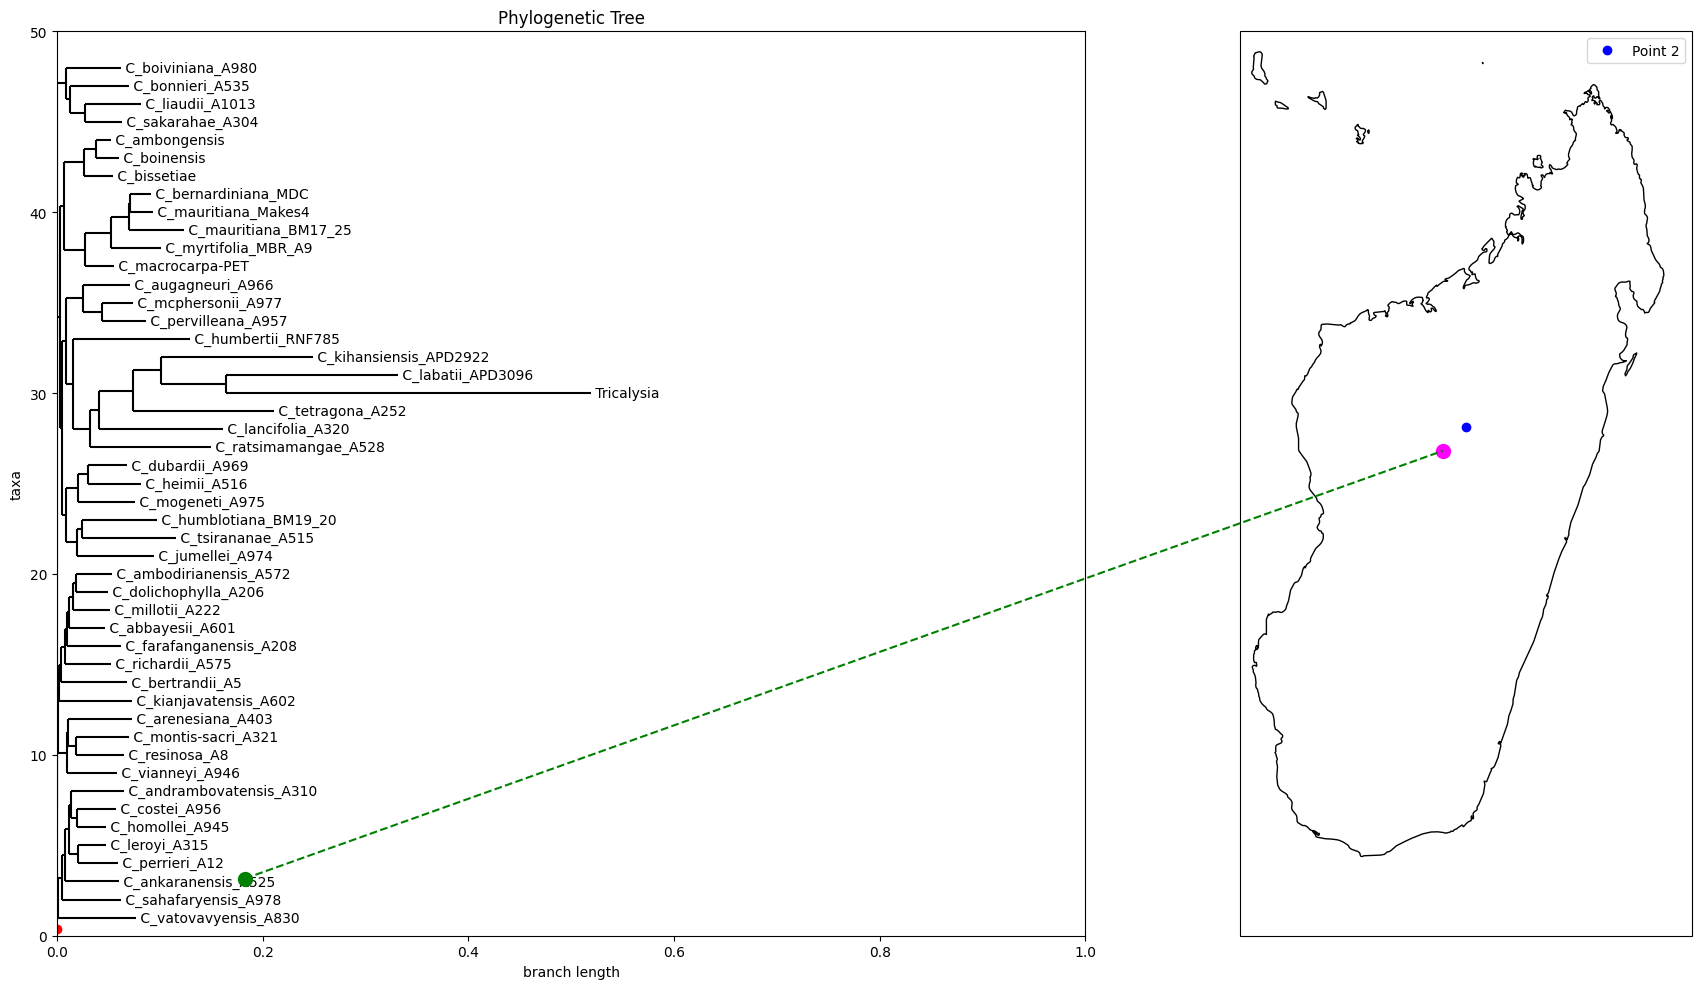

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from Bio import Phylo

# Load your tree
tree = Phylo.read("../tree/phylogenetic_tree.nwk", "newick")

# Read the GPS data
gps = pd.read_csv(r'../data/sample_data_mada.csv', index_col=0)
gps.index.name = "ID"

def custom_label(clade):
    if clade.is_terminal():
        return clade.name
    else:
        return None

def calc_node_positions(tree, x_start, x_end):
    if tree.is_terminal():
        x_pos = x_start
    else:
        x_pos = (x_start + x_end) / 2
        for child in tree.clades:
            x_pos = calc_node_positions(child, x_start, x_end)
            x_start = x_pos
    tree.position = (x_pos, tree.branch_length)
    return x_pos

calc_node_positions(tree.root, 0, 1)

extent = [43, 51, -27, -11]

fig = plt.figure(figsize=(20, 10))

# Create the tree subplot with explicit xlim and ylim
ax_tree = fig.add_subplot(121)
Phylo.draw(tree, do_show=False, axes=ax_tree, label_func=custom_label)
ax_tree.set_title("Phylogenetic Tree")
ax_tree.set_xlim(0, 1)  # Adjust xlim as needed
ax_tree.set_ylim(0, 50)  # Adjust ylim as needed
node_positions = {clade.name: clade.position for clade in tree.find_clades()}

# Access positions of tree nodes
print("Position of node 'Tricalysia':", node_positions.get('Tricalysia'))

# Create the map subplot with explicit xlim and ylim
ax_map = fig.add_subplot(122, projection=ccrs.PlateCarree())
ax_map.set_extent(extent)
ax_map.add_feature(cfeature.COASTLINE)
ax_map.add_feature(cfeature.BORDERS, linestyle=':')
ax_map.set_xlim(43, 51)  # Adjust xlim as needed
ax_map.set_ylim(-27, -11)  # Adjust ylim as needed

# Example data points
x1, y1 = node_positions.get('Tricalysia', (0, 0.35542))  # Default coordinates if 'Tricalysia' not found
x2, y2 = 47, -18

# Plot the points
ax_tree.plot(x1, y1, 'ro', label='Point 1')
ax_map.plot(x2, y2, 'bo', label='Point 2')
ax_map.legend()

# Custom transformation functions
def data_to_display(ax, x, y):
    """Convert data coordinates (x, y) in axes `ax` to display coordinates."""
    return ax.transData.transform([x, y])

def display_to_figure(fig, xy_display):
    """Convert display coordinates (x_disp, y_disp) to figure coordinates."""
    return fig.transFigure.inverted().transform(xy_display)

# Convert data coordinates to display coordinates for both axes
xy1_display = data_to_display(ax_tree, x1, y1)
xy2_display = data_to_display(ax_map, x2, y2)

# Convert display coordinates to figure coordinates
fig_xy1 = display_to_figure(fig, xy1_display)
fig_xy2 = display_to_figure(fig, xy2_display)

# Validate by plotting points in figure coordinates
point1 = plt.Line2D([fig_xy1[0]], [fig_xy1[1]], color='green', marker='o', linestyle='None', markersize=10)
point2 = plt.Line2D([fig_xy2[0]], [fig_xy2[1]], color='magenta', marker='o', linestyle='None', markersize=10)
fig.add_artist(point1)
fig.add_artist(point2)

# Draw the line in figure coordinates
line = plt.Line2D([fig_xy1[0], fig_xy2[0]], [fig_xy1[1], fig_xy2[1]], 
                  transform=fig.transFigure, color="green", linestyle="--")
fig.lines.append(line)

plt.tight_layout()
plt.show()


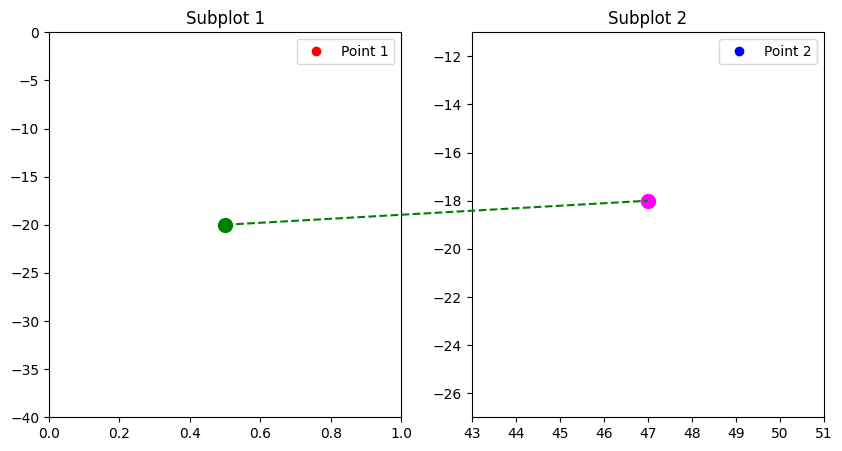

In [13]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig = plt.figure(figsize=(10, 5))

# Create first subplot with specified axis ranges
ax1 = fig.add_subplot(121)
x1, y1 = 0.5, -20  # Example point in subplot 1
ax1.plot(x1, y1, 'ro', label='Point 1')
ax1.set_xlim(0, 1)
ax1.set_ylim(-40, 0)
ax1.set_title('Subplot 1')
ax1.legend()

# Create second subplot with specified axis ranges
ax2 = fig.add_subplot(122)
x2, y2 = 47, -18  # Example point in subplot 2
ax2.plot(x2, y2, 'bo', label='Point 2')
ax2.set_xlim(43, 51)
ax2.set_ylim(-27, -11)
ax2.set_title('Subplot 2')
ax2.legend()

# Convert the points' coordinates from their respective axes to display coordinates
xy1 = ax1.transData.transform([x1, y1])
xy2 = ax2.transData.transform([x2, y2])

# Convert display coordinates to figure coordinates
fig_xy1 = fig.transFigure.inverted().transform(xy1)
fig_xy2 = fig.transFigure.inverted().transform(xy2)

# Validate by plotting points in figure coordinates using plt.Line2D
point1 = plt.Line2D([fig_xy1[0]], [fig_xy1[1]], color='green', marker='o', linestyle='None', markersize=10)
point2 = plt.Line2D([fig_xy2[0]], [fig_xy2[1]], color='magenta', marker='o', linestyle='None', markersize=10)
fig.add_artist(point1)
fig.add_artist(point2)

# Draw the line in figure coordinates
line = plt.Line2D([fig_xy1[0], fig_xy2[0]], [fig_xy1[1], fig_xy2[1]], 
                  transform=fig.transFigure, color="green", linestyle="--")
fig.lines.append(line)

# Show the plot
plt.show()

